In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
train = pd.read_csv("./Kdata/train.csv")
test = pd.read_csv("./Kdata/test.csv")

In [3]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
train.info() ##查找是否有缺失值
print('*************')
test.info() ## 没有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
*************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   seas

In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
train.describe() ## check unusual value

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
## Divide datetime element
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [11]:
train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["dayofweek"]=train["datetime"].dt.dayofweek
train["hour"]=train["datetime"].dt.hour

In [12]:
test["year"]=test["datetime"].dt.year
test["month"]=test["datetime"].dt.month
test["day"]=test["datetime"].dt.day
test["dayofweek"]=test["datetime"].dt.dayofweek
test["hour"]=test["datetime"].dt.hour

In [13]:
train=train.drop("datetime", axis = 1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  dayofweek   10886 non-null  int64  
 15  hour        10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.3 MB
None


In [15]:
##Outlier detection
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare (train_data)
Outliers_to_drop = detect_outliers(train,2,["season", "holiday", "workingday", "weather", "temp", "atemp","humidity","windspeed","casual", "registered", "count", "year", "month", "day", "dayofweek","hour"])


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  dayofweek   10886 non-null  int64  
 15  hour        10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.3 MB


In [17]:
len(Outliers_to_drop)

42

In [18]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True) 

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10844 entries, 0 to 10843
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10844 non-null  int64  
 1   holiday     10844 non-null  int64  
 2   workingday  10844 non-null  int64  
 3   weather     10844 non-null  int64  
 4   temp        10844 non-null  float64
 5   atemp       10844 non-null  float64
 6   humidity    10844 non-null  int64  
 7   windspeed   10844 non-null  float64
 8   casual      10844 non-null  int64  
 9   registered  10844 non-null  int64  
 10  count       10844 non-null  int64  
 11  year        10844 non-null  int64  
 12  month       10844 non-null  int64  
 13  day         10844 non-null  int64  
 14  dayofweek   10844 non-null  int64  
 15  hour        10844 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.3 MB


In [20]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
count,10844.000000,10844.000000,10844.000000,10844.00000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000,10844.000000
mean,2.506363,0.028495,0.680284,1.41931,20.200553,23.625563,61.964220,12.776392,35.631132,153.664884,189.296016,2011.500000,6.520657,9.985706,3.015585,11.522409
std,1.117325,0.166390,0.466388,0.63429,7.787672,8.472504,19.219014,8.143309,49.540034,148.105384,177.675563,0.500023,3.448283,5.478512,2.005672,6.920595
min,1.000000,0.000000,0.000000,1.00000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,1.000000,6.000000
50%,3.000000,0.000000,1.000000,1.00000,20.500000,24.240000,62.000000,12.998000,16.000000,118.000000,144.000000,2011.500000,7.000000,10.000000,3.000000,12.000000
75%,4.000000,0.000000,1.000000,2.00000,26.240000,31.060000,77.000000,16.997900,48.000000,221.000000,282.000000,2012.000000,10.000000,15.000000,5.000000,18.000000
max,4.000000,1.000000,1.000000,4.00000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,6.000000,23.000000


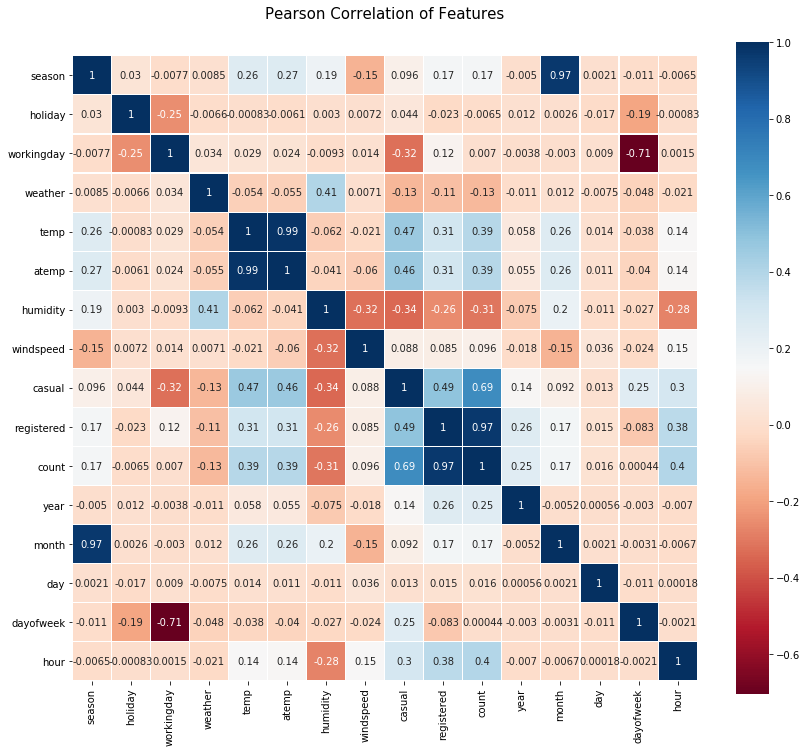

In [21]:
## check related feature for count
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [22]:
##Count has correlation with registered, casual, temp, atemp, hour, year, season, day, month. 
##Count has negative correlation with humidity, weather, dayofweek
## Total is 15 features
train.shape

(10844, 16)

# Data Visualization

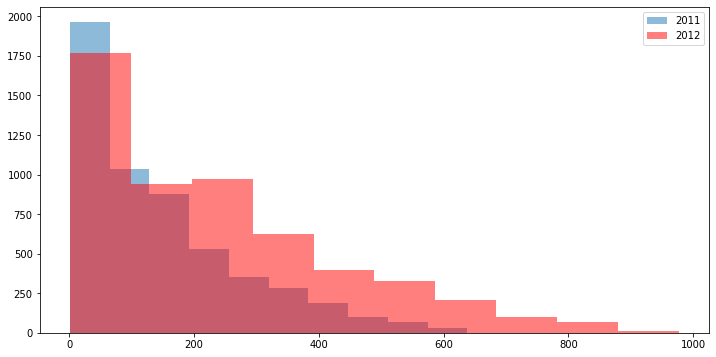

In [23]:
## Compare count number in 2011 and 2012
plt.figure(figsize=(12,6))
plt.hist(train['count'][train['year'] == 2011], alpha=0.5, label='2011')
plt.hist(train['count'][train['year'] == 2012], alpha=0.5, label='2012', color='red')
plt.legend()
plt.show()
## 2012 has more rentals in 2012 than 2011

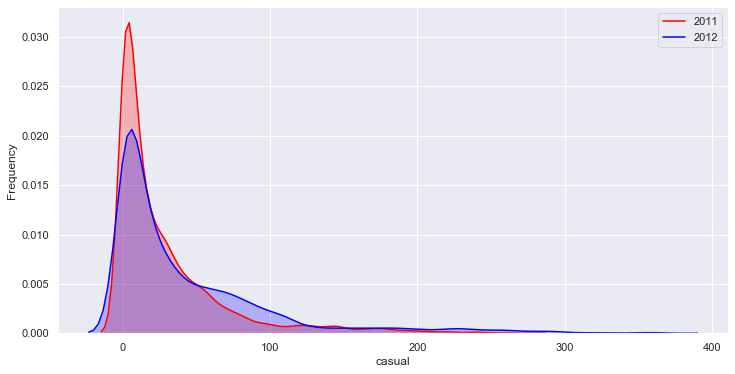

In [24]:
sns.set()
plt.figure(figsize=(12,6))
g = sns.kdeplot(train["casual"][(train["year"] == 2011)], color="Red", shade = True)
g = sns.kdeplot(train["casual"][(train["year"] == 2012)], ax =g, color="Blue", shade= True)
g.set_xlabel("casual")
g.set_ylabel("Frequency")
g = g.legend(["2011","2012"])

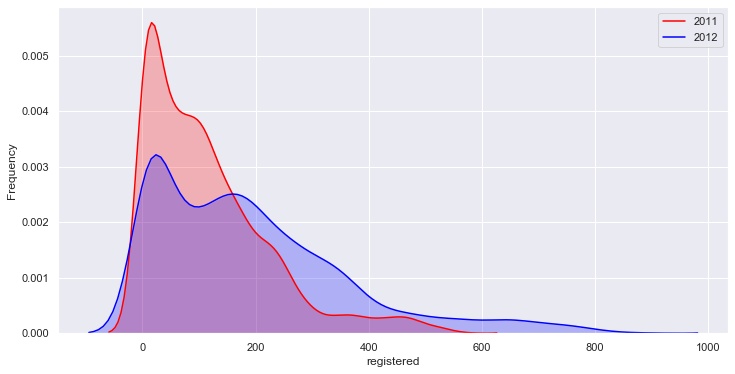

In [25]:
sns.set()
plt.figure(figsize=(12,6))
g = sns.kdeplot(train["registered"][(train["year"] == 2011)], color="red", shade = True)
g = sns.kdeplot(train["registered"][(train["year"] == 2012)], ax =g, color="Blue", shade= True)
g.set_xlabel("registered")
g.set_ylabel("Frequency")
g = g.legend(["2011","2012"])

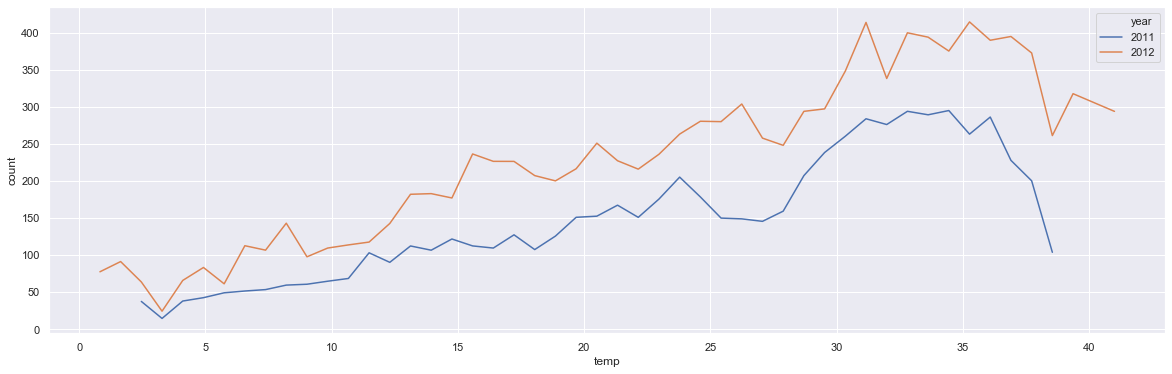

In [26]:
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#temp & count
plt.figure(figsize=(20,6))
g = sns.lineplot(x="temp", y ='count', data=train, hue='year', palette="deep", err_style=None)
##2012 rentals > 2011 in temp

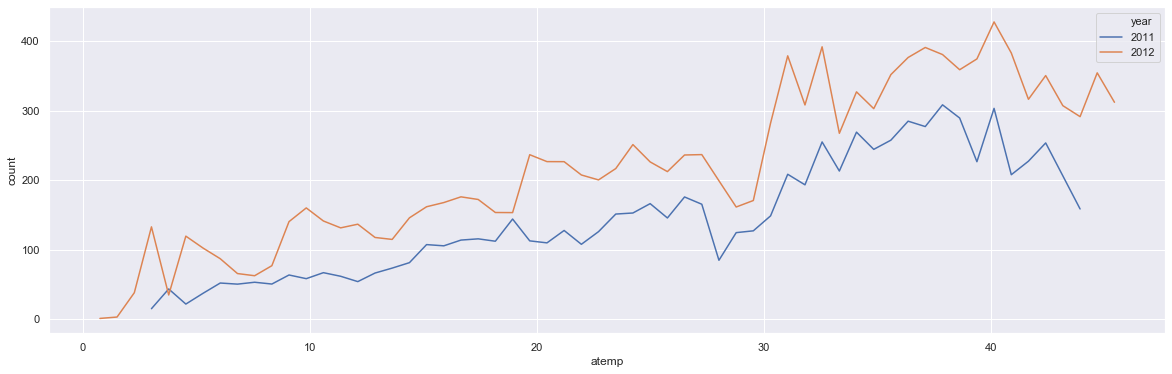

In [27]:
## atemp & count 
plt.figure(figsize=(20,6))
g = sns.lineplot(x="atemp", y ='count', data=train, hue='year', palette="deep", err_style=None)
##2012 rentals > 2011 in atemp

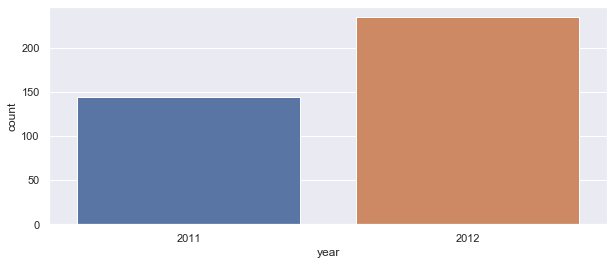

In [28]:
#year
plt.figure(figsize=(10,4))
g = sns.barplot(x="year", y ='count', data=train, ci=None)

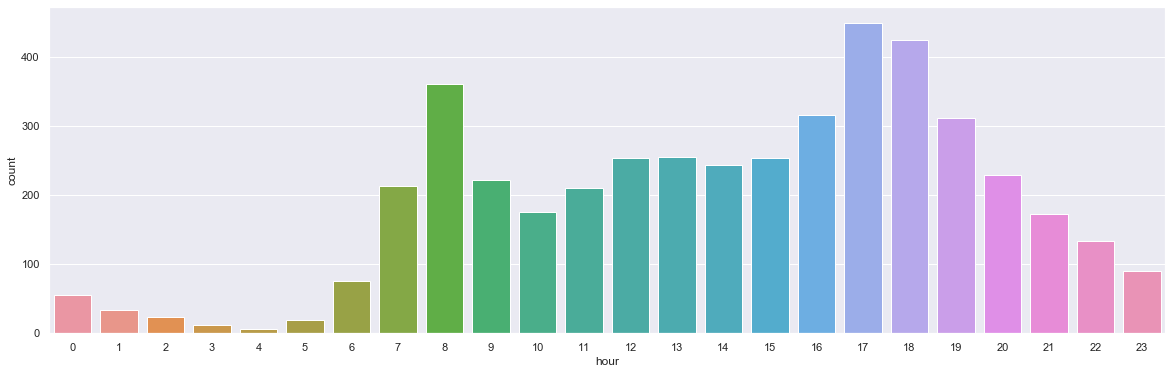

In [29]:
##hour
##Count has correlation with registered, casual, temp, atemp, hour, year, season, day, month. 
##Count has negative correlation with humidity, weather, dayofweek
plt.figure(figsize=(20,6))
g = sns.barplot(x="hour", y ='count', data=train, ci=None)

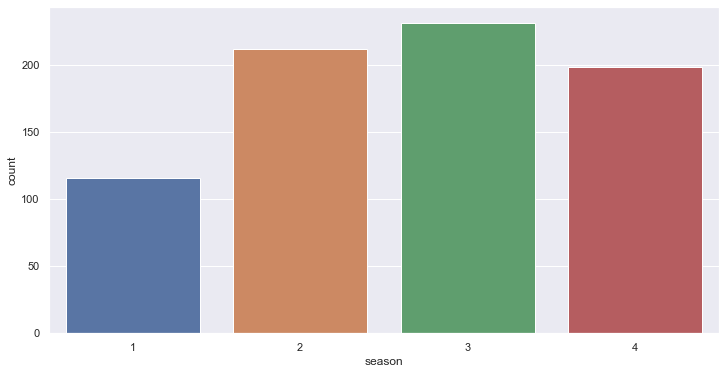

In [30]:
#season
plt.figure(figsize=(12,6))
g = sns.barplot(x="season", y ='count', data=train, ci=None)

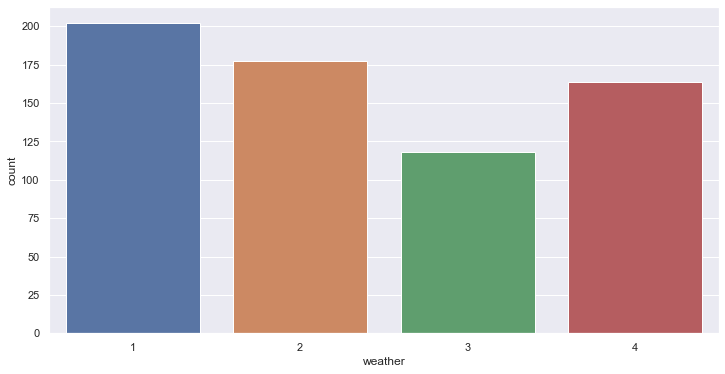

In [31]:
#weather
plt.figure(figsize=(12,6))
g = sns.barplot(x="weather", y ='count', data=train, ci=None)

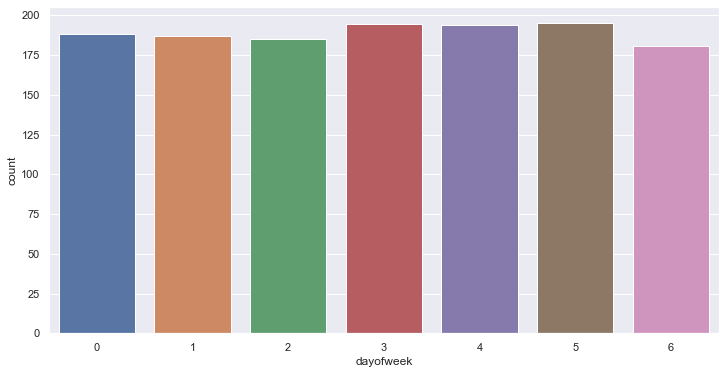

In [32]:
#dayofweeks
plt.figure(figsize=(12,6))
g = sns.barplot(x="dayofweek", y ='count', data=train, ci=None)

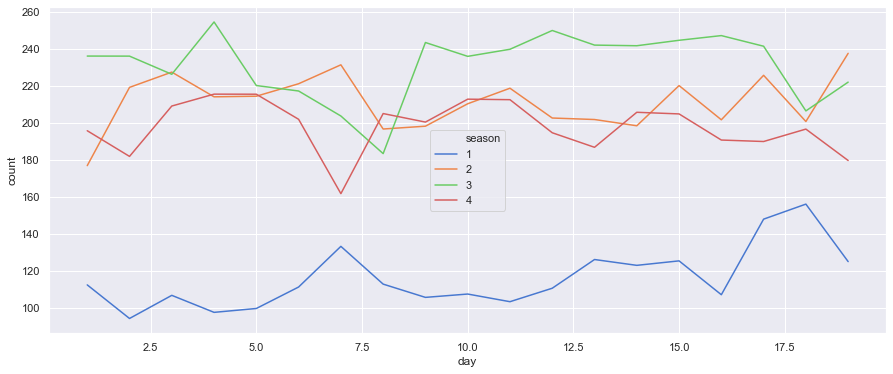

In [33]:
#day
plt.figure(figsize=(15,6))
g = sns.lineplot(x="day", y ='count',data=train, hue='season', palette="muted", err_style=None)

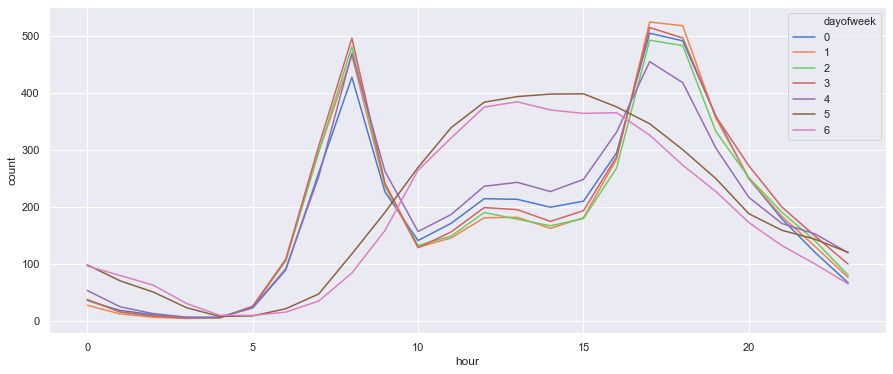

In [34]:
plt.figure(figsize=(15,6))
g = sns.lineplot(x="hour", y ='count',data=train, hue='dayofweek', palette="muted", err_style=None)

In [35]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


# Modeling

In [36]:
X = train.drop(['count', 'casual', 'registered'],axis=1)
Y = train['count']

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8675 entries, 2573 to 2732
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8675 non-null   int64  
 1   holiday     8675 non-null   int64  
 2   workingday  8675 non-null   int64  
 3   weather     8675 non-null   int64  
 4   temp        8675 non-null   float64
 5   atemp       8675 non-null   float64
 6   humidity    8675 non-null   int64  
 7   windspeed   8675 non-null   float64
 8   year        8675 non-null   int64  
 9   month       8675 non-null   int64  
 10  day         8675 non-null   int64  
 11  dayofweek   8675 non-null   int64  
 12  hour        8675 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 948.8 KB


In [38]:
# y is predict value y_ is actual value
def RMSLE(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(Y_train)
lModel.fit(X_train, yLabelsLog)

# Make predictions train data prediction
preds = lModel.predict(X_train)
print ("RMSLE Value For Linear Regression: ", RMSLE(np.exp(yLabelsLog),np.exp(preds),False))


RMSLE Value For Linear Regression:  0.972936420829122


In [40]:
## test score
lModel = LinearRegression()
lModel.fit(X_test,Y_test)
preds = lModel.predict(X_test)
print(explained_variance_score(preds,Y_test))

-0.6726512006512606


# Ridge Regression

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge = Ridge()

ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(RMSLE,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

yLabelsLog = np.log1p(Y_train)
grid_ridge.fit(X_train, yLabelsLog)
preds = grid_ridge.predict(X_train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

{'alpha': 100, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9729707421248786


In [42]:
grid_ridge.fit(X_test,Y_test)
preds = grid_ridge.predict(X_test)
print(explained_variance_score(preds,Y_test))

-0.6726519504747548


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

# Lasso Regression

In [43]:
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
yLabelsLog = np.log1p(Y_train)
grid_lasso.fit(X_train, yLabelsLog)
preds = grid_lasso.predict(X_train)
print('RMSLE Value for Lasso Regression {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9731710128283366


In [44]:
yLabelsLog = np.log1p(Y_test)
grid_lasso.fit(X_test,Y_test)
preds = grid_lasso.predict(X_test)
print(explained_variance_score(preds,Y_test))

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

-0.6726832706572299


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

# RandomForest Regression

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)

#train data score
yLabelsLog = np.log1p(Y_train)
grid_rf.fit(X_train,yLabelsLog)
preds = grid_rf.predict(X_train)
print('RMSLE Value for RandomForest {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

print('*************************************************************')
## test score
yLabelsLog = np.log1p(Y_test)
grid_rf.fit(X_test,Y_test)
preds = grid_rf.predict(X_test)
print(explained_variance_score(preds,Y_test))

RMSLE Value for RandomForest 0.10679397083166044
*************************************************************


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow e

0.8789023067482694


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


# GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)

#train data score
yLabelsLog = np.log1p(Y_train)
grid_gb.fit(X_train,yLabelsLog)
preds = grid_gb.predict(X_train)
print('RMSLE Value for GradientBoosting {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

print('*************************************************************')
## test score
yLabelsLog = np.log1p(Y_test)
grid_gb.fit(X_test, Y_test)
preds = grid_gb.predict(X_test)
print('RMSLE Value for GradientBoosting {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))
print(explained_variance_score(preds,Y_test))

RMSLE Value for GradientBoosting 0.15881806628014272
*************************************************************


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipyk

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow e

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipyk

/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pand

RMSLE Value for GradientBoosting 188.10657319936897
-283.9922077353918


/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/janeliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


# XGboost

In [67]:
import xgboost as xgb
xg= xgb.XGBRegressor(n_estimators=1000, learning_rate=0.09, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)## max_depth = 7 is the best #0.9613418910325503

In [68]:
xg.fit(X_train,Y_train)

[18:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.09, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [69]:
predictions = xg.predict(X_test)
print(explained_variance_score(predictions,Y_test))

0.9616653536479896


In [70]:
##training data MSE
yLabelsLog = np.log1p(Y_train)
xg.fit(X_train,yLabelsLog)
preds = xg.predict(X_train)
print('RMSLE Value for XGBoost {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

print('************************************************')
##testing data MSE
yLabelsLog = np.log1p(Y_test)
xg.fit(X_test,yLabelsLog)
preds = xg.predict(X_test)
print('RMSLE Value for XGBoost {}'.format(RMSLE(np.exp(yLabelsLog),np.exp(preds),False)))

[18:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE Value for XGBoost 0.0337556848563182
************************************************
[18:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE Value for XGBoost 0.000990785212789394


In [71]:
preds

array([2.399663 , 5.6391764, 5.1235805, ..., 6.1891026, 6.1382937,
       6.152387 ], dtype=float32)

In [66]:
# test for parameters 
# list = [800, 900, 1000, 2000]
# for i in list:
#     xg= xgb.XGBRegressor(n_estimators=i, learning_rate=0.09, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)
#     xg.fit(X_train,Y_train)
#     predictions = xg.predict(X_test)
#     print(i)
#     print(explained_variance_score(predictions,Y_test)) # 0.9616653536479896 n_estimators is 1000 the best

[18:39:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
800
0.9616386401836933
[18:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
900
0.9616475450921911
[18:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1000
0.9616653536479896
[18:40:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2000
0.9613899862011903


In [72]:
x_test =  test.drop(['datetime'],axis=1)

In [73]:
pred = xg.predict(x_test)
pred

array([2.6163797, 2.1430283, 1.7007067, ..., 5.0899415, 4.5864873,
       4.314506 ], dtype=float32)

In [74]:
pred1 = []
for i in pred:
    a = int(round(i))
    pred1.append(a)

In [75]:
submission = pd.DataFrame({
        "datetime": test['datetime'],
        "count": pred1
    })
submission.to_csv('./Kdata/bike_Kaggle.csv', index=False)

In [76]:
df = pd.read_csv('./Kdata/bike_Kaggle.csv')
df.head()

,datetime,count
0,2011-01-20 00:00:00,3
1,2011-01-20 01:00:00,2
2,2011-01-20 02:00:00,2
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,1
